# **Data Visualization Techniques on FIFA 18 Player Statistics**
Data visualization is a vital component in Data Science to understand the data you're working with and to discover any trends and associations between different features. You cannot blindly model your data or assume that features are correlated by intuition. In order to get a quick and concise grasp of your data, making simple plots is the best thing to do.

There are many different libraries used for data visualization and countless types of plots that can be generated. For this kernel, I will show how to take a dataset, like the FIFA 18 Player Statistics data, and quickly generate plots to discover insights about the features of the players. I will give explanations along the way, and for each graph, I will describe what the plot reveals to us. 

For this kernel, I will be using ***Seaborn*** and ***Matplotlib***, but of course there are other libraries you can explore as well like plotly, or even Tableau, a software for easily joining data and making different plots without much code.

*Please upvote and share if this helps you!! Also, feel free to fork this kernel to play around with the code and test it for yourself. If you plan to use any part of this code, please reference this kernel!* I will be glad to answer any questions you may have in the comments. Thank You! 

*Make sure to follow me for Future Kernels even better than this one!*

# **Why Should We Use Data Visualization?**
* ## EDA (Exploratory Data Analysis)
   * Understand the data you’re working with and discover trends between features.
   * Communicate correlations and associations effectively.
   * Easy to interpret/analyze.
* ## Benefits
   * Find garbage data (can somebody’s age be 1000?).
   * See if we need to transform/normalize our data so our modelling results are better.
   * See clustering and where most values fall in.
   * Determine the preprocessing/modelling algorithms we should use.

# **Good/Bad Practices For Data Visualization**
* Simple is always better. Try to avoid overly fancy and complicated plots.
   * **Data-to-ink ratio:** the higher the ratio, the better. Use as little ink as possible, with as much information conveyed as possible.
* AVOID Pie Charts/3D Plots!!
   * They may look fancy and cool but our brains can’t perceive the relative proportions displayed on these plots well enough, and may be very misleading.
   * **Area Principle:** Area must be proportional to the relative proportion of the data.
* Consider your Audience!
   * Don’t sacrifice information for aesthetics or ease of interpretation.
   * Make sure the people viewing your visualizations can easily and quickly grasp the idea conveyed by the plot.

# **Contents**
1. Setting Up Environment and Importing Libraries
2. Histograms
3. Barplots
4. Scatterplots
5. Customizing Plot Settings
6. Subplots

# **1. Setting Up Environment and Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings("ignore")

### Visualization Libraries
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#sets the gridstyle for plots made 
%matplotlib inline  
#no need for plt.show()

['data.csv']


In [2]:
df = pd.read_csv("../input/data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Here are all the different features of the players that we can visualize and find trends with.

In [3]:
print(df.keys())

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# **2. Histograms**
The first type of plot we will cover are histograms. Histograms are used for numerical data and can be used to see the shape of the distribution of the dataset (whether if it's skewed or not). Histograms display the number of values within each bin value along the x-axis. Beware however, because the histogram shape will drastically change depending on the bin sizes, which you can change to any size.

By plotting a histogram of a dataset, you can visually estimate the density of data within certain values. Histograms are generally the most useful plot for communicating the distribution of a set of numerical data.

## Example
Let's try plotting a distribution of the “Age” column in the data and describe what the histogram shows us. We will use seaborn to make the histogram, which is simply the distplot method in the library. It takes in a couple of arguments; column, bins, kde, and norm_hist are some of the most important parameters for this method.

* *Column*
   * Pass in the actual column of a dataset. This can be a Pandas series, list, or even array.
   * This is the actual data that will be plotted.
* *Bins*
   * Pass in a list of the bin values on the x-axis.
   * These bin values will be used to generate the graph and be displayed.
* *KDE*
   * Pass True or False depending on whether you want to fit a Kernel Density Estimate.
   * Will fit and display a probability density function on the histogram used to make inferences about the data with Statistical methods.
* *Norm_Hist*
   * Pass True or False depending on whether to normalize the histogram or not.
   * This pertains to the Area Principle discussed above and will be crucial to use if bin values varry. It normalizes the histogram by changing the y-axis to a density scale instead of the raw count number. An application of this will be shown below.

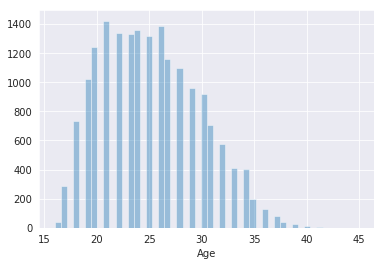

In [4]:
def make_histogram(column, bins=None, kde=False, norm_hist=False):
    """
    This function returns a seaborn histogram based on an inputted dataset column.
    :param column: column of dataset
    :param bins: list of bin values of the histogram
    :param kde: boolean of fitting kernel density estimate 
    :param norm_hist: boolean of normalizing histogram
    :returns: histogram of the column
    """
    return sns.distplot(df[column], bins=bins, kde=kde, norm_hist=norm_hist);

#sns.distplot(df["Age"], bins=[15, 20, 25, 30, 35, 40, 45], kde=False, norm_hist=False)
age_histogram = make_histogram("Age")

> Kind of a weird histogram since there are so many gaps in between the bars. We may need to adjust the bin size to get a cleaner display of the data. This shows how much the shape of a histogram can change depending on the bins.

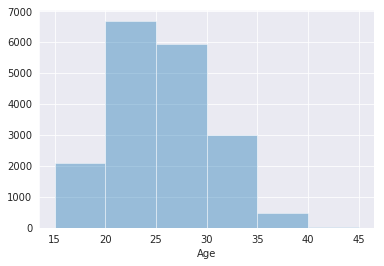

In [5]:
age_histogram = make_histogram("Age", [15, 20, 25, 30, 35, 40, 45])

## What Does This Tell Us?

## Area Principle
Since the bin sizes are unequal, the histogram shape is misleading since some bins may appear much larger than others, when it shouldn't. The relative density of the data within the bin is greatly exaggerated and the histogram is made misleading. To fix this, instead of using counts on the y-axis, we can normalize the histogram and use a density scale. To do so, set the *norm_hist* parameter of histogram to be True and it will normalize the histogram. 

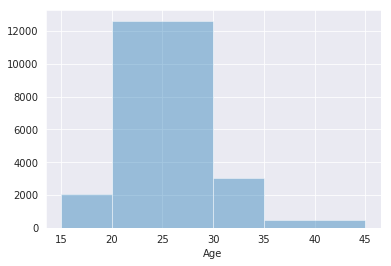

In [6]:
uneven_bins = make_histogram("Age", [15, 20, 30, 35, 45])

>The 20-30 bin of the histogram above is greatly oversized compared to the other bins. Although it may have a lot more values than other bins, the proportion is wrong and the difference is greatly exaggerated. This histogram doesn't take into account the bin size, but simply the number of values within the bin.

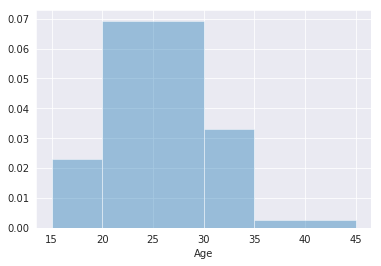

In [7]:
uneven_bins_normalized = make_histogram("Age", [15, 20, 30, 35, 45], norm_hist=True)

>By normalizing the histogram, the other bins are made a little bigger because we are using a density scale which takes the bin size into account as well. The smaller bins, as you can see, are slughtly bigger because their bin sizes are much smaller than the 20-30 bin. This gives a more accurate visual representation of the data distribution.

# **3. Barplots**
Barplots are used to compare two categories, like Gender and LongPassing, for example. It will show the difference between the LongPassing statistic between the genders, Male and Female. Of course, for other variables, there can be more values compared like Position for example, where there are numerous positions that can be compared. Depending on the height of each bar, you can immediately notice visually how different Genders or Positions can impact a player's LongPassing stat.

Another feature of barplots that are very useful are **hues**, which is essentially adding a third feature to the two features already being compared. This hue feature will show how it affects the Gender/Position category by adding multiple bars for each gender/position. A graphical display will be shown below and explained. Just remember that barplots are used to compare categories instead of raw numerical data like histograms.

## Example
Let's make a barplot displaying the LongPassing stat for each position. As a bonus, we will add a hue of the Preferred Foot of the player to see how that impacts the LongPassing for each position.

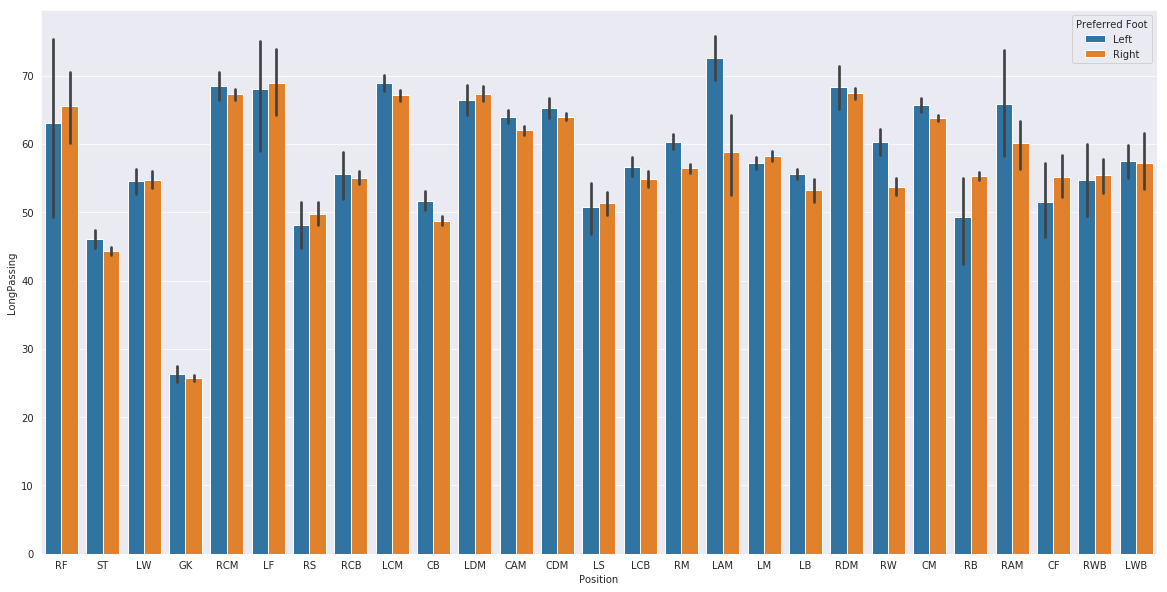

In [8]:
def make_barplot(x_column, y_column, data, x_inches, y_inches, hue=None):
    """
    This function returns a seaborn barplot based on the data columns passed in.
    :param x_column: x-axis column as a string
    :param y_column: y-axis column as a string
    :param hue: hue column as a string
    :param data: dataframe containing above columns
    :returns: barplot of the columns
    """
    #set size of plot bigger to fit the display
    fig = plt.gcf() #create the graph figure
    fig.set_size_inches(x_inches, y_inches) #set figure to x inches and y inches
    return sns.barplot(x=x_column, y=y_column, hue=hue, data=data);

position_longpassing = make_barplot("Position", "LongPassing", df, 20, 10, "Preferred Foot")

## What Does This Tell Us?

# **4. Scatterplots**
Scatterplots are used to compare two sets of numerical data, like Overall and Potential, for example. It will display a graph where you can identify the relation between the two variables, whether it be linear or nonlinear. Through scatterplots, you can visualize the strength of the association/correlation by performing regressions and fitting lines/curves along the points. Scatterplots are one of the most important graphs in Data Science and many Machine Learning algorithms are based upon it.

Another useful feature of scatterplots is that you can easily spot outliers in your data, or datapoints that seem to stray from the main points of data. You can also see the residuals/leverages for each datapoint when you fit a regression.

## Example
Lets graph a scatterplot of Acceleration against Stamina and describe what the plot tells us. As a bonus, we will add a hue for Preferred Foot to differentiate points on the plot based on the preferred foot of the player.

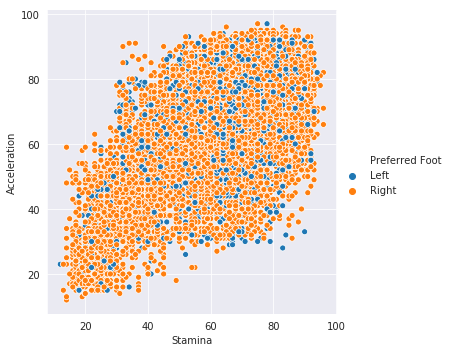

In [9]:
def make_scatterplot(x_column, y_column, data, hue=None, regression=False):
    """
    This function returns a seaborn barplot based on the data columns passed in.
    :param x_column: x-axis column as a string
    :param y_column: y-axis column as a string
    :param data: dataframe containing above columns
    :param hue: hue column as a string
    :param regression: boolean of whether to plot regression 
    :returns: barplot of the columns
    """
    if not regression:
        return sns.relplot(x=x_column, y=y_column, hue=hue, data=data);
    else:
        assert hue is None, "Can't have Hue with Regression Plot"
        return sns.regplot(x=x_column, y=y_column, data=data);

acc_stam_regression = make_scatterplot("Stamina", "Acceleration", df, "Preferred Foot")

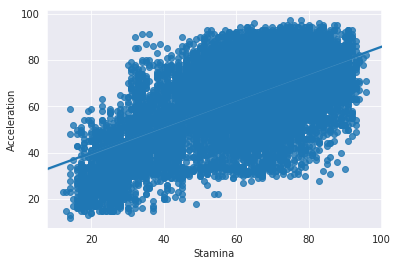

In [10]:
#Regression Plot
acc_stam_regression = make_scatterplot("Stamina", "Acceleration", df, regression=True)

>You can test the strength of the regression with tools like SciPy

## What Does This Tell Us?

# **5. Customizing Plot Settings**
There are many tools in Matplotlib/Seaborn that allow us to customize our plot settings so that a more preferrable, and easier to read, plot may be produced. 

## Labelling Plot Axis
You should always label your x and y axis in any plot you make, as well as a relevant title that summarizes your plot. You can do this simply by calling a few methods after you have finished making your plot.


Text(0.5, 1.0, "FIFA Players' Stamina vs. Acceleration Ratings")

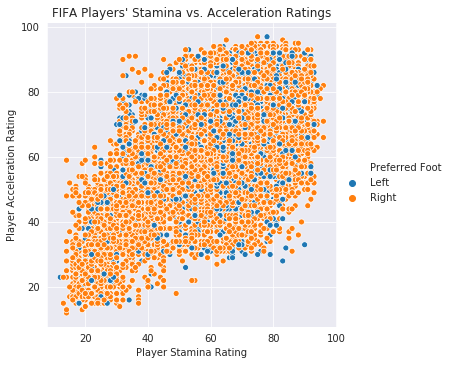

In [11]:
sns.relplot(x="Stamina", y="Acceleration", hue="Preferred Foot", data=df)
plt.xlabel("Player Stamina Rating")
plt.ylabel("Player Acceleration Rating")
plt.title("FIFA Players' Stamina vs. Acceleration Ratings")

## Scaling Plot Axis
Sometimes we want to visualize our data on a certain scale. While libraries like matplotlib automatically determine the best scale for the data to be visualized on, sometimes it is necessary to use a different scale. You may also be interested in only a particular section of a graph from x1 to x2, so you can change the axis range to zoom in on that part of the plot. We can limit both the x and y values to a certain range.

(20, 60)

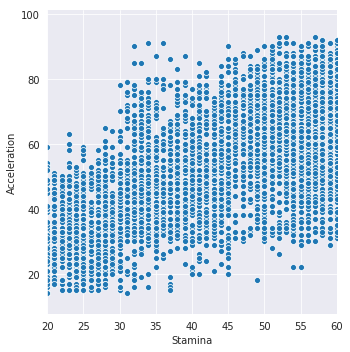

In [12]:
sns.relplot(x="Stamina", y="Acceleration", data=df);
plt.xlim(20, 60)
#plt.ylim(y1, y2) 
#plt.axis([min x, max x, min y, max y])

## Graph Legend
When using matplotlib, and overlaying plots for example, it will not automatically display the legend and you may end up with multiple plots that correspond to different features. It is always useful to make a legend so you can immediately recognize which graph pertains to which feature. 

Text(0.5, 0, 'Overall')

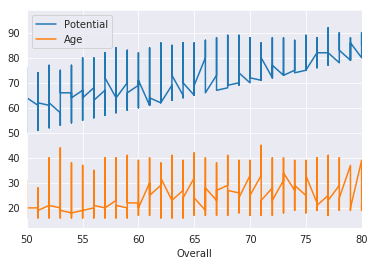

In [13]:
plt.plot(df["Overall"], df["Potential"]) #plt.scatter
plt.plot(df["Overall"], df["Age"])
plt.xlim(50, 80)
plt.legend(["Potential", "Age"])
plt.xlabel("Overall")

# **6. Subplots**
Subplots are useful to display multiple different graphs in one output; you can compare two graphical displays at once. With subplots, you don’t need to make a new cell to display another graph that has the same idea as the first graph. This is useful for making smaller pairplots.

Furthermore, when making subplots, things can get messy and plots and overlay each other making parts unreadable and labelling axis very difficult. To handle this issue, we can use the subplots_adjust method to make adjustments by shifting plots. Adjustment include: **left**, **right**, **bottom**, **top**, **wspace** (horizontal space between subplots), **hspace** (vertical space between subplots). Set x to a decimal number in order to adjust the spacing; play around to find optimal value!

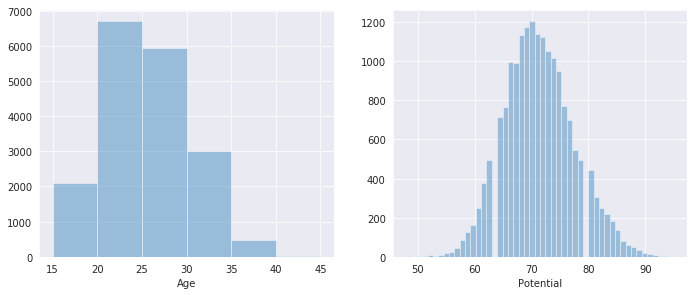

In [14]:
plt.figure()
fig = plt.gcf() #creates the plot figure object
fig.set_size_inches(10, 10) #sets the plot size
plt.subplot(2, 2, 1) #first subplot, 2 rows and 2 columns
sns.distplot(df["Age"], bins=[15, 20, 25, 30, 35, 40, 45], kde=False, norm_hist=False) #make plot
plt.subplot(2, 2, 2) #second subplot, 2 rows and 2 columns
sns.distplot(df["Potential"], kde=False, norm_hist=False) #make plot
plt.subplots_adjust(left=0) #shift to make plots legible

That was a brief introduction to simple but effective and necessary data visualization for any data science problem you are tackling! We covered some of the most useful plots to explore data and discover trends between features. Seaborn and matplotlib are two of the most popular and widely used data visualization tools in Python. There are also other tools like plotly which can create more interactive and complex plots, as well as Tableau which can create beautiful and creative dashboards. However, keep in mind that the simpler the plot, the better. Visualziations you make should be clean and convey the information you are trying to display.

If you liked this notebook, please give an upvote and leave suggestions in the comments on what types of tools you would like to see next! Also please help support me by following me for great future notebooks. If you have any questions, feel free to ask in the comments and I will reply. Thank you!